In [1]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/Users/Goleo8/anaconda2/lib/python2.7/site-packages/pandas/core/indexes/bas

In [2]:
df = pd.read_csv('../datasets/telecom/telecom_churn.csv')

In [3]:
print(df.shape)
df.info()

(3333, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-

In [4]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

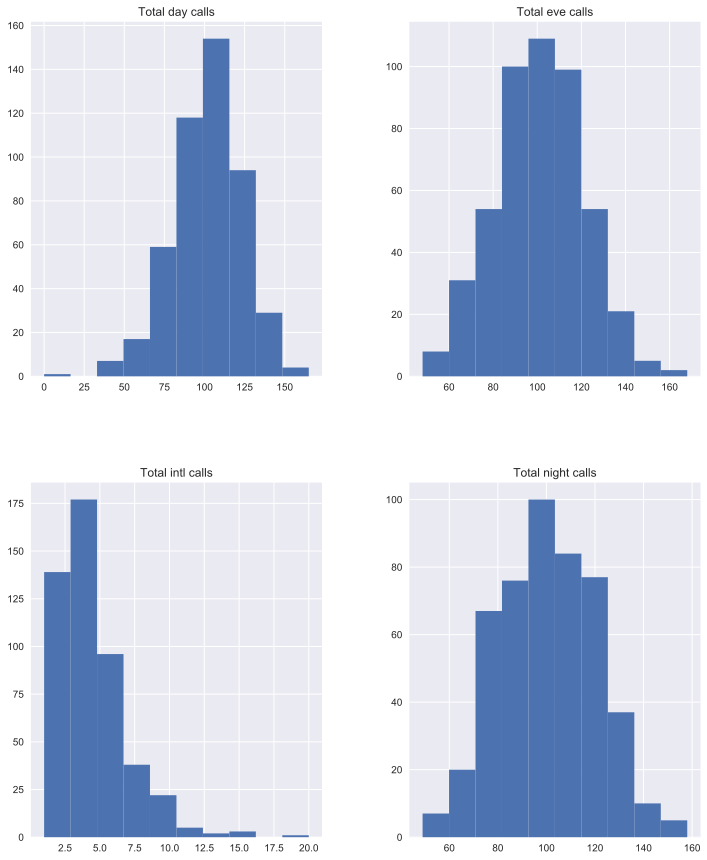

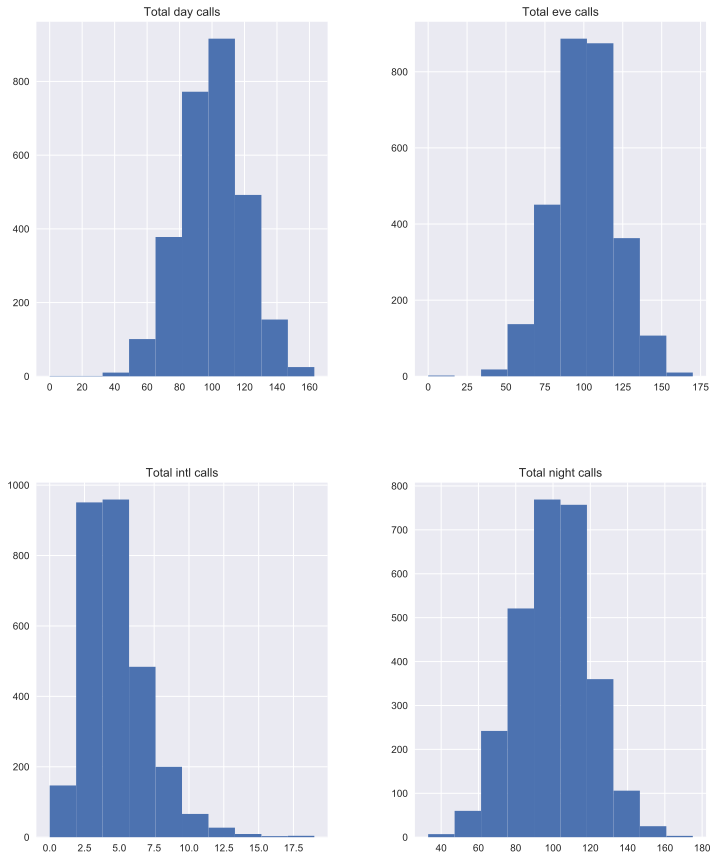

In [5]:
features = ['Total day calls','Total eve calls', 'Total night calls', 'Total intl calls']
for i in (True,False):
    df[df['Churn']==i][features].hist(figsize=(12,15))

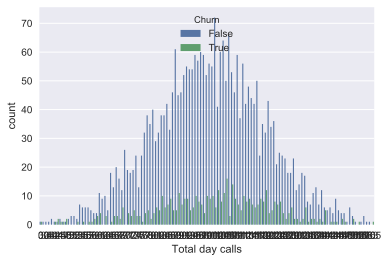

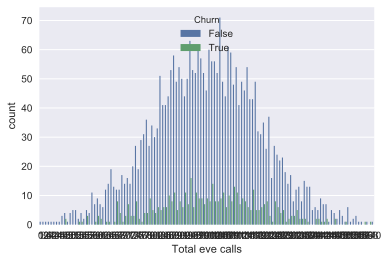

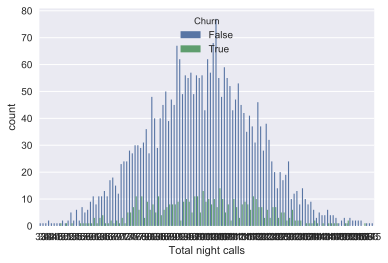

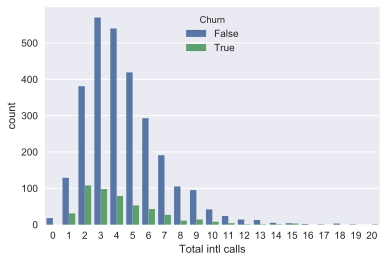

In [6]:
for feature in features:
    sns.countplot(x=feature,hue='Churn',data=df)
    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11c565550>,
      dtype=object)

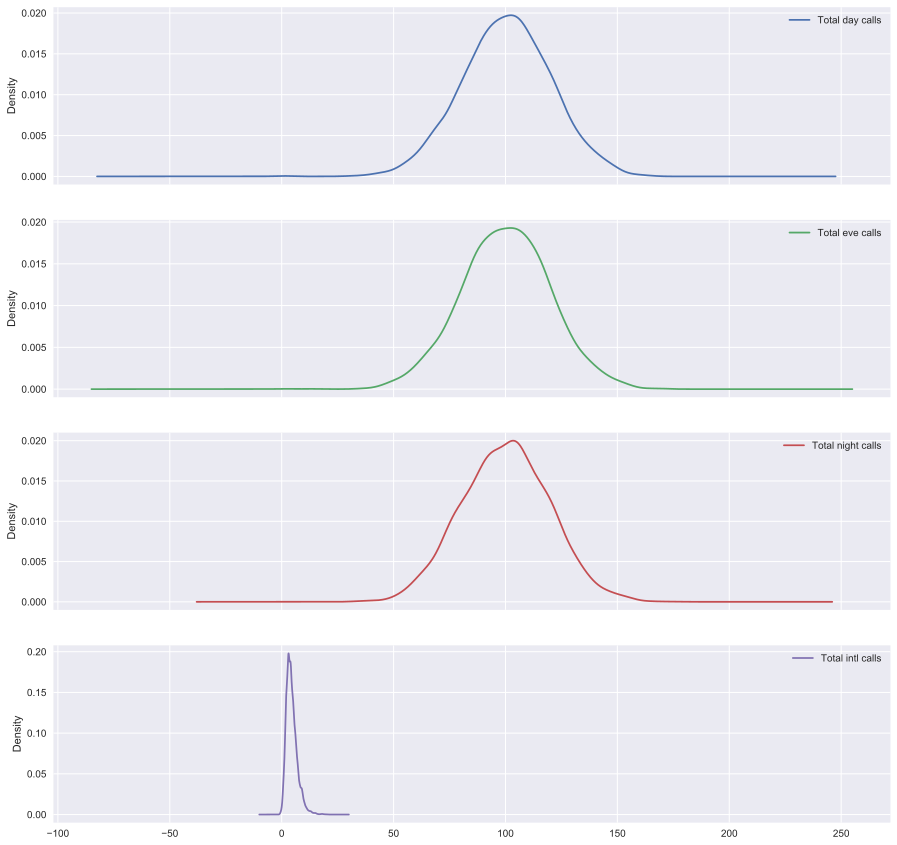

In [7]:
df[features].plot(kind='density',subplots=True,figsize=(15,15))

Churn
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

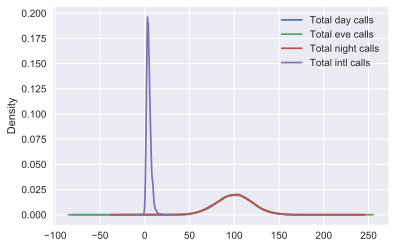

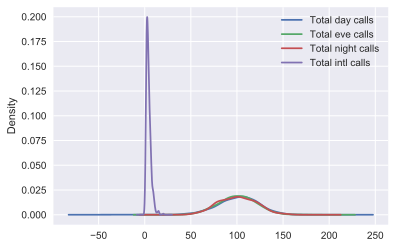

In [8]:
df.groupby('Churn')[features].plot(kind='density')

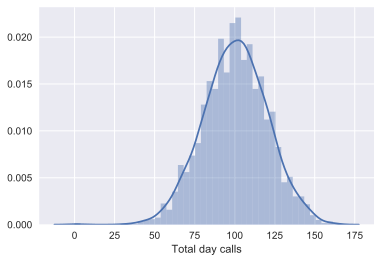

In [9]:
sns.distplot(df['Total day calls'])

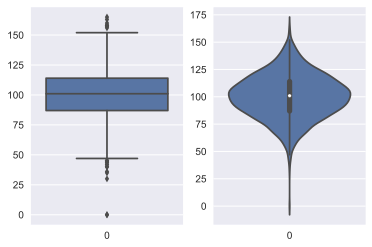

In [10]:
_,axes=plt.subplots(1,2)
sns.boxplot(data=df['Total day calls'],ax=axes[0])
sns.violinplot(data=df['Total day calls'],ax=axes[1])

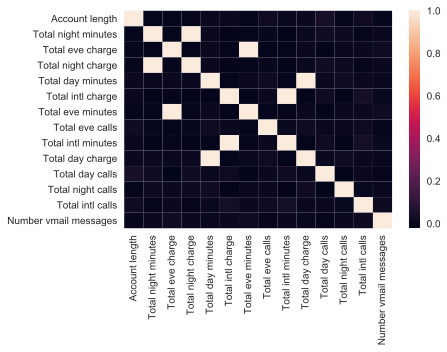

In [44]:

numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

corr_df = df[numerical].corr()
sns.heatmap(corr_df)

In [45]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

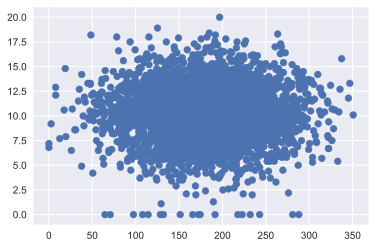

In [46]:
plt.scatter(df['Total day minutes'],df['Total intl minutes'])

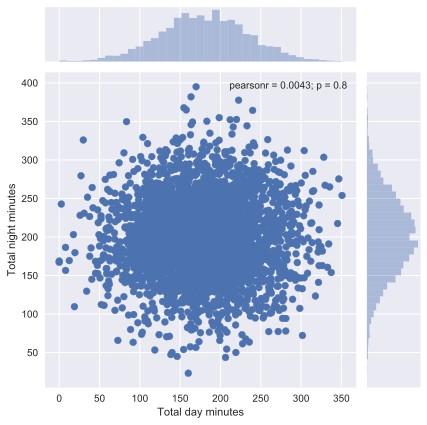

In [11]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

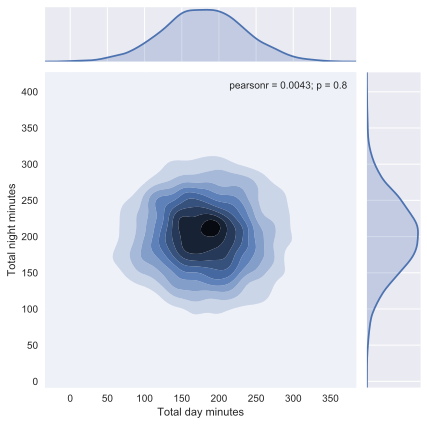

In [12]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='kde');

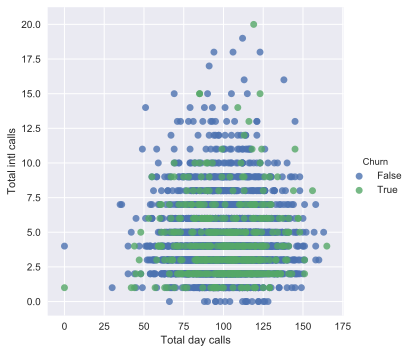

In [13]:
sns.lmplot(x='Total day calls',y='Total intl calls', hue='Churn', data=df, fit_reg=False)

In [14]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

In [15]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

In [16]:
numerical.append('Customer service calls')
numerical

['Account length',
 'Total day minutes',
 'Total night minutes',
 'Total eve minutes',
 'Total eve calls',
 'Total intl minutes',
 'Total day calls',
 'Total night calls',
 'Total intl calls',
 'Number vmail messages',
 'Customer service calls']

In [17]:
len(numerical)

11

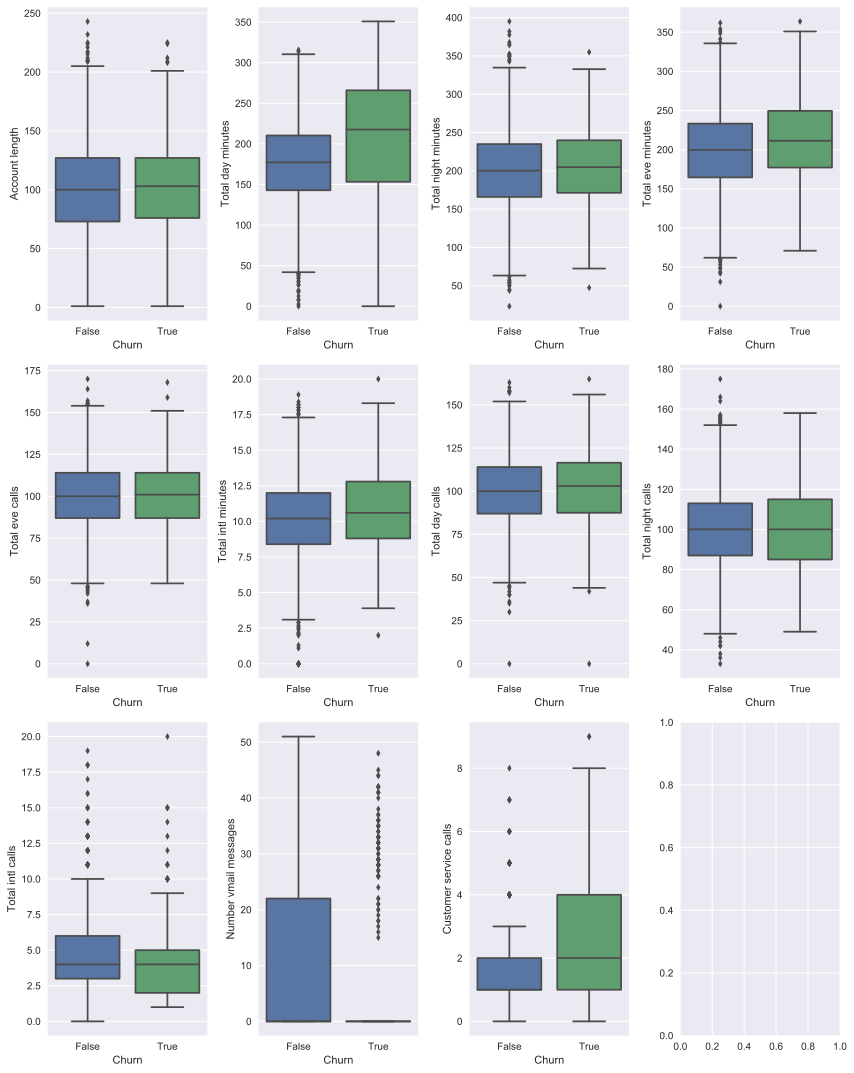

In [24]:
fig, axes = plt.subplots(3,4,figsize=(12,15))

for i,feature in enumerate(numerical):
    sns.boxplot(y=feature,x='Churn',data=df,ax=axes[i/4,i%4])
    axes[i/4,i%4].set_ylabel(feature)
fig.tight_layout()

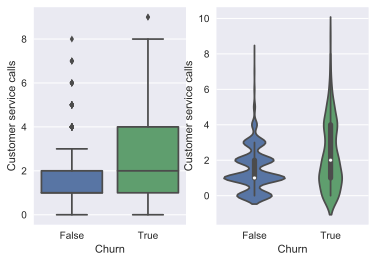

In [32]:
fig, axes = plt.subplots(1,2,figsize=(6,4))
sns.boxplot(x='Churn',y='Customer service calls',data=df,ax=axes[0])
sns.violinplot(x='Churn',y='Customer service calls',data=df,ax=axes[1])

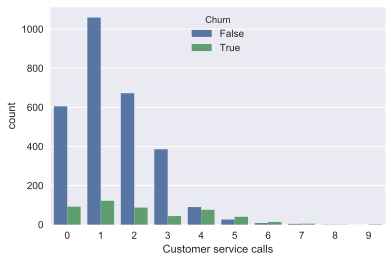

In [35]:
sns.countplot(x='Customer service calls',hue='Churn',data=df)

In [36]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [38]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [39]:
df.drop?

In [41]:
new_df = df.drop(['State','Churn'],axis=1)

In [42]:
new_df['International plan']=new_df['International plan'].map({'No':0,'Yes':1})
new_df['Voice mail plan']=new_df['Voice mail plan'].map({'No':0,'Yes':1})
new_df.head()

Account length  Area code  International plan  Voice mail plan  \
0             128        415                   0                1   
1             107        415                   0                1   
2             137        415                   0                0   
3              84        408                   1                0   
4              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [43]:
sd_df = StandardScaler().fit_transform(new_df)

In [44]:
%%time
tsne=TSNE(random_state=42)
tsne_repr=tsne.fit_transform(sd_df)

CPU times: user 1min 28s, sys: 7.95 s, total: 1min 36s
Wall time: 1min 37s


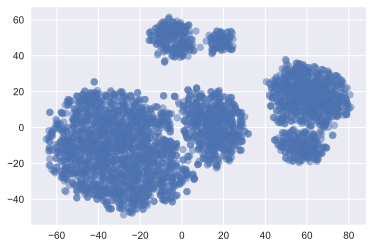

In [48]:
plt.scatter(x=tsne_repr[:,0],y=tsne_repr[:,1],alpha=0.5)

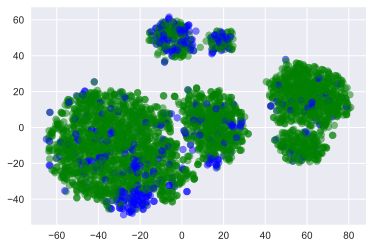

In [50]:
plt.scatter(x=tsne_repr[:,0],y=tsne_repr[:,1],c=df['Churn'].map({True:'Blue',False:'Green'}),alpha=0.5)

In [92]:
vdf = pd.read_csv('../datasets/video/video_games_sales.csv')

In [53]:
vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [71]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values=np.nan,strategy='most_frequent',axis=0)

In [83]:
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].dropna().value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].dropna().mean() for c in X],
            index=X.columns)
        print(self.fill)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [100]:
vdf['User_Score']=vdf['User_Score'].replace({'tbd':np.nan})
new_vdf=DataFrameImputer().fit_transform(vdf)

Name               Need for Speed: Most Wanted
Platform                                   PS2
Year_of_Release                        2006.49
Genre                                   Action
Publisher                      Electronic Arts
NA_Sales                               0.26333
EU_Sales                              0.145025
JP_Sales                             0.0776021
Other_Sales                          0.0473318
Global_Sales                          0.533543
Critic_Score                           68.9677
Critic_Count                           26.3608
User_Score                                 7.8
User_Count                              162.23
Developer                              Ubisoft
Rating                                       E
dtype: object


In [101]:
new_vdf['User_Score'] = new_vdf['User_Score'].astype('float64')
new_vdf['Year_of_Release'] = new_vdf['Year_of_Release'].astype('int64')
new_vdf['User_Count'] = new_vdf['User_Count'].astype('int64')
new_vdf['Critic_Count'] = new_vdf['Critic_Count'].astype('int64')

In [102]:
new_vdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16719 non-null object
Platform           16719 non-null object
Year_of_Release    16719 non-null int64
Genre              16719 non-null object
Publisher          16719 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       16719 non-null float64
Critic_Count       16719 non-null int64
User_Score         16719 non-null float64
User_Count         16719 non-null int64
Developer          16719 non-null object
Rating             16719 non-null object
dtypes: float64(7), int64(3), object(6)
memory usage: 2.0+ MB


In [103]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
new_vdf[useful_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 10 columns):
Name               16719 non-null object
Platform           16719 non-null object
Year_of_Release    16719 non-null int64
Genre              16719 non-null object
Global_Sales       16719 non-null float64
Critic_Score       16719 non-null float64
Critic_Count       16719 non-null int64
User_Score         16719 non-null float64
User_Count         16719 non-null int64
Rating             16719 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 1.3+ MB


In [104]:
new_vdf[useful_cols].head()

Name Platform  Year_of_Release         Genre  \
0                Wii Sports      Wii             2006        Sports   
1         Super Mario Bros.      NES             1985      Platform   
2            Mario Kart Wii      Wii             2008        Racing   
3         Wii Sports Resort      Wii             2009        Sports   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   

   Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Rating  
0         82.53     76.000000            51         8.0         322      E  
1         40.24     68.967679            26         7.8         162      E  
2         35.52     82.000000            73         8.3         709      E  
3         32.77     80.000000            73         8.0         192      E  
4         31.37     68.967679            26         7.8         162      E

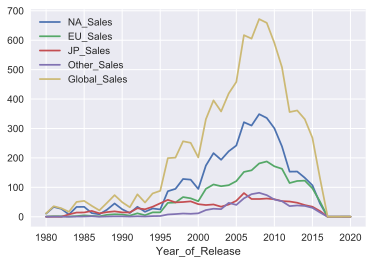

In [109]:
new_vdf[[x for x in new_vdf.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

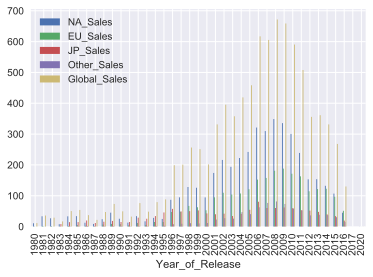

In [115]:
new_vdf[[x for x in new_vdf.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar')

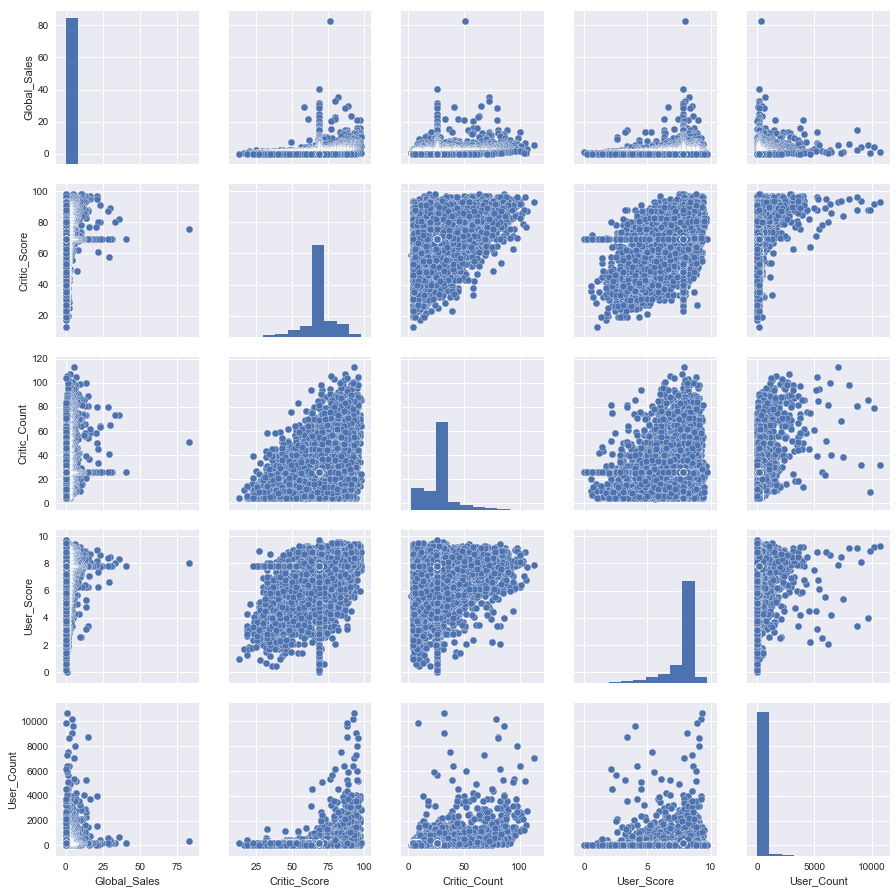

In [117]:
# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png' 
sns.pairplot(new_vdf[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

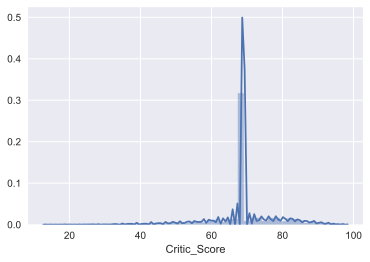

In [119]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(new_vdf['Critic_Score'])

In [126]:
pivot_df=new_vdf.pivot_table(values='Global_Sales',index='Genre',columns='Platform',aggfunc='sum').fillna(0).applymap(float)

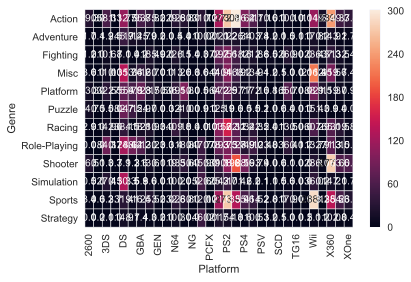

In [130]:
sns.heatmap(pivot_df,annot=True,linewidths=.5,fmt='.1f')

In [131]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

ImportError: No module named plotly.offline